In [1]:
import geopandas

gdf = geopandas.read_file("data/sydney.geojson")
gdf.head(1)

,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry
0,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
# df = pd.read_csv("/content/zomato_df_final_data.csv")

df = geopandas.read_file('data/zomato_df_final_data.csv', GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")

In [4]:
# fixing lat and lng values
# i have some missing values as well
df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
df['lng'] = pd.to_numeric(df['lng'], errors='coerce')

In [5]:
df = df.dropna(subset=['lat', 'lng'])

In [6]:
# making geometry column for the join
# getting points not polygon
from shapely.geometry import Point
df['geometry'] = df.apply(lambda row: Point(row['lng'], row['lat']), axis=1)
df.head(1)


,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color,geometry
0,"371A Pitt Street, CBD, Sydney",50,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4,Very Good,CBD,Sydney Madang,['Casual Dining'],1311,FALSE,#e15307,5.243902439,#6f706b,POINT (151.20760 -33.87606)


In [7]:
# spatial join
# how = right
# so it will keep all the gdf columns
# cuisine will have some non-string values
# because relationship is one to many index value will repeat
result = geopandas.sjoin(df, gdf, how='right', op='within')
result.head(5)

,index_left,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,...,votes,groupon,color,cost_2,cuisine_color,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry
0,2697.0,"745-899 Elizabeth Drive, Bonnyrigg, Sydney",130,"['Italian', 'Pizza', 'Tapas']",-33.881260,https://www.zomato.com/sydney/amorettis-bonnyrigg,150.859422,02 8786 1777,3.3,Average,...,65,FALSE,#fd9243,11.42276423,#6f706b,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."
0,6411.0,"Shop 4, 60-68 Stockdale Crescent, Abbotsbury,...",78,"['Italian', 'Pizza']",-33.869781,https://www.zomato.com/sydney/8-slices-pizzari...,150.865070,(02) 9610 9910,3,Average,...,18,FALSE,#fdab66,7.406504065,#6f706b,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."
1,3099.0,"378 Great North Road, Abbotsford, Sydney",70,"['Latin American', 'Fusion']",-33.850952,https://www.zomato.com/sydney/the-cove-dining-...,151.129112,02 9713 7896,3.3,Average,...,19,FALSE,#fd9243,6.788617886,#6f706b,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8..."
1,7143.0,"547 Great North Road, Abbotsford, Sydney",45,"['Pizza', 'Italian']",-33.848228,https://www.zomato.com/sydney/charleys-pizzeri...,151.128233,02 9712 2111,,,...,,FALSE,#000000,4.857723577,#6f706b,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8..."
1,4265.0,"557 Great North Road, Abbotsford, Sydney",50,['Thai'],-33.847773,https://www.zomato.com/sydney/cinnamon-thai-cu...,151.127959,02 9713 9133,3.6,Good,...,54,FALSE,#f57622,5.243902439,#6f706b,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8..."


In [8]:
count = 0
for val in result["cuisine"]:
  if isinstance(val, str):
    count = count
  else:
    count+=1
print(count)

113


In [9]:
# convert to str
result["cuisine"] = result["cuisine"].astype(str)

In [10]:
# fixing index
result = result.reset_index(drop=True)

In [11]:
# test
# plot all suburbs with indian cuisine
# not heat map
#create subset with indian cuisine
indian_restaurant_suburbs = result[result['cuisine'].str.contains("Indian")]

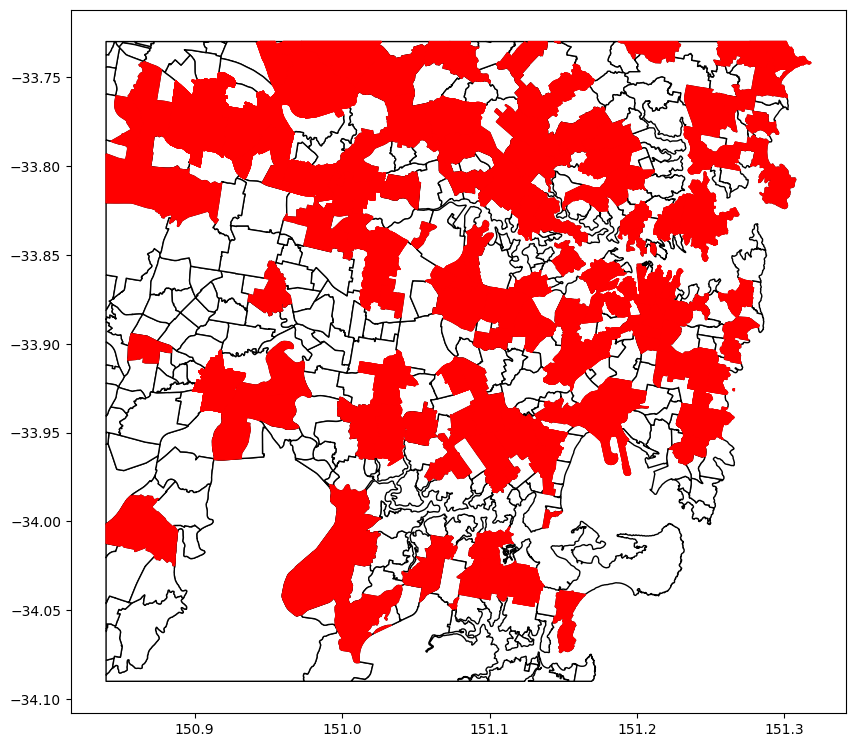

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot("SQKM", ax=ax, color='white', edgecolor = "black")
indian_restaurant_suburbs.plot("SQKM", ax=ax, color='red', edgecolor = "red")
plt.show()

In [13]:
indian_restaurant_suburbs.columns

Index(['index_left', 'address', 'cost', 'cuisine', 'lat', 'link', 'lng',
       'phone', 'rating_number', 'rating_text', 'subzone', 'title', 'type',
       'votes', 'groupon', 'color', 'cost_2', 'cuisine_color', 'SSC_CODE',
       'SSC_NAME', 'CONF_VALUE', 'SQKM', 'geometry'],
      dtype='object')

In [14]:
indian_restaurant_suburbs["subzone"].value_counts()

subzone
Parramatta                              44
Surry Hills                             13
Blacktown                               13
Liverpool                               11
Crows Nest                               7
                                        ..
Granville                                1
Broadway Shopping Centre, Glebe          1
Freshwater Village Plaza, Freshwater     1
Fairfield                                1
Woolloomooloo                            1
Name: count, Length: 150, dtype: int64

In [15]:
subzone_counts = indian_restaurant_suburbs['subzone'].value_counts().reset_index()
subzone_counts.columns = ['subzone', 'count']

subzone_gdf = indian_restaurant_suburbs[['subzone', 'geometry', 'SQKM']].drop_duplicates(subset='subzone')

# Merge the counts with the GeoDataFrame based on 'subzone'
subzone_gdf = pd.merge(subzone_gdf, subzone_counts, on='subzone', how='left')
subzone_gdf

# # Plot the GeoDataFrame
# subzone_gdf.plot(column='count', cmap='YlGnBu', legend=True, figsize=(12, 8))
# plt.title("Subzone Cuisine Occurrences")
# plt.axis('off')  # Turn off axis

# plt.show()


,subzone,geometry,SQKM,count
0,Brookvale,"POLYGON ((151.25097 -33.75696, 151.25096 -33.7...",6.708513,1
1,Hurstville,"POLYGON ((151.10876 -33.97265, 151.10874 -33.9...",0.624729,3
2,Annandale,"POLYGON ((151.16836 -33.87822, 151.16838 -33.8...",1.488626,2
3,Arncliffe,"POLYGON ((151.14307 -33.94394, 151.14246 -33.9...",2.923780,1
4,Artarmon,"POLYGON ((151.17547 -33.81212, 151.17547 -33.8...",2.671590,1
...,...,...,...,...
145,Waterloo,"POLYGON ((151.19926 -33.89666, 151.19913 -33.8...",1.133799,1
146,Wollstonecraft,"POLYGON ((151.19339 -33.84577, 151.19338 -33.8...",0.639179,1
147,Pymble,"POLYGON ((151.11991 -33.76621, 151.11989 -33.7...",3.683628,1
148,West Ryde,"POLYGON ((151.07376 -33.81035, 151.07330 -33.8...",3.565553,1


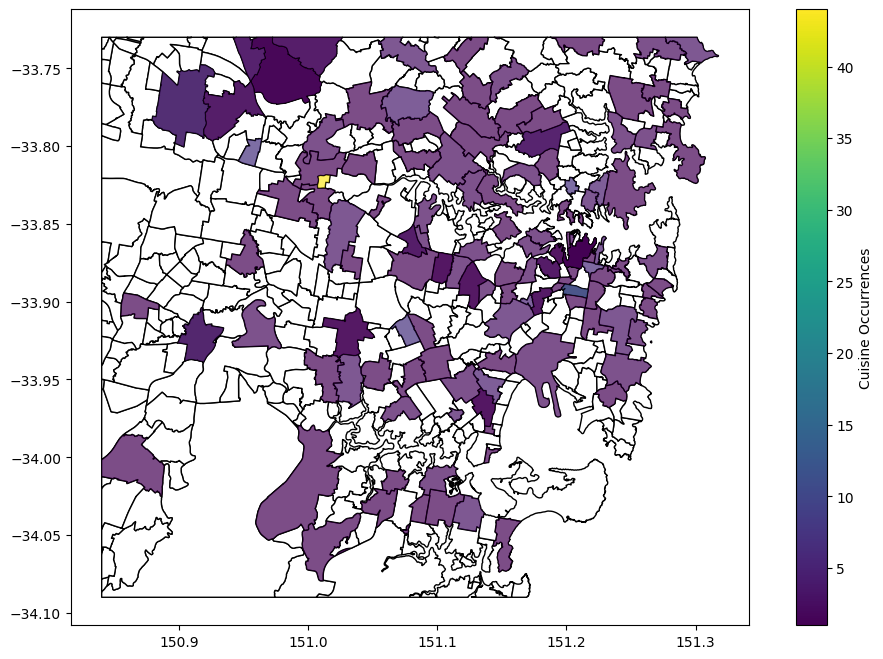

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

gdf.plot("SQKM", ax=ax, color='white', edgecolor = "black")
subzone_gdf.plot(column='count', cmap='viridis', linewidth=0.5, ax=ax, legend=True, edgecolor='k', alpha=0.7, legend_kwds={'label': "Cuisine Occurrences"})

# Add count annotations on top of each polygon
# for x, y, count in zip(subzone_gdf.geometry.centroid.x, subzone_gdf.geometry.centroid.y, subzone_gdf['count']):
#     ax.annotate(int(count), xy=(x, y), xytext=(3, 3), textcoords="offset points", color="black", fontsize=10, ha='center', va='center')
plt.show()

In [13]:
import plotly.express as px
fig = px.choropleth(
    gdf,
    geojson=gdf.geometry,
    locations=gdf.index
)